<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Distance / Similarity functions (Euclidean, Manhattan, Cosine, Minkowski, Jaccard)

In [1]:
import numpy as np
from sklearn.metrics import jaccard_score

def euclidean(a, b):
    a, b = np.asarray(a), np.asarray(b)
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    a, b = np.asarray(a), np.asarray(b)
    return np.sum(np.abs(a - b))

def minkowski(a, b, p):
    a, b = np.asarray(a), np.asarray(b)
    return np.sum(np.abs(a - b) ** p) ** (1.0 / p)

def cosine_similarity(a, b):
    a, b = np.asarray(a), np.asarray(b)
    denom = (np.linalg.norm(a) * np.linalg.norm(b))
    return np.dot(a, b) / denom if denom != 0 else 0.0

def jaccard_index(a, b):
    # For binary vectors. Convert to ints 0/1 if needed.
    a, b = np.asarray(a).astype(int), np.asarray(b).astype(int)
    # sklearn's jaccard_score expects 1D arrays and returns a float
    return jaccard_score(a, b)  # if vectors are binary

if __name__ == "__main__":
    p = [2,3,0,1]
    q = [5,7,1,0]
    print("Euclidean:", euclidean(p,q))
    print("Manhattan:", manhattan(p,q))
    print("Minkowski p=3:", minkowski(p,q,3))
    print("Cosine sim:", cosine_similarity(p,q))
    # for Jaccard, example binary vectors:
    a = [1,1,0,0]
    b = [1,1,1,0]
    print("Jaccard:", jaccard_index(a,b))


Euclidean: 5.196152422706632
Manhattan: 9
Minkowski p=3: 4.530654896083492
Cosine sim: 0.9566807697649697
Jaccard: 0.6666666666666666


2) K-Means clustering (sklearn)

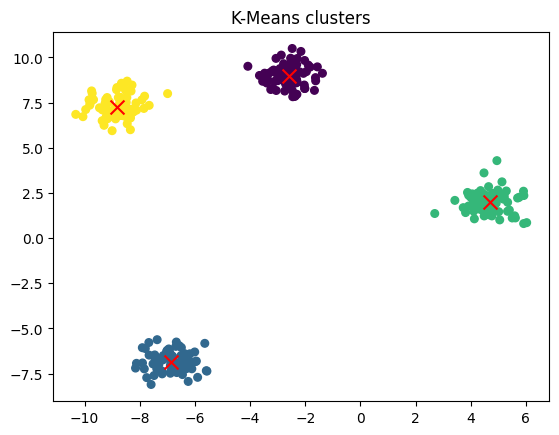

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=100, marker='x')
plt.title("K-Means clusters")
plt.show()


3) Hierarchical clustering (single, complete, average, Ward, centroid)

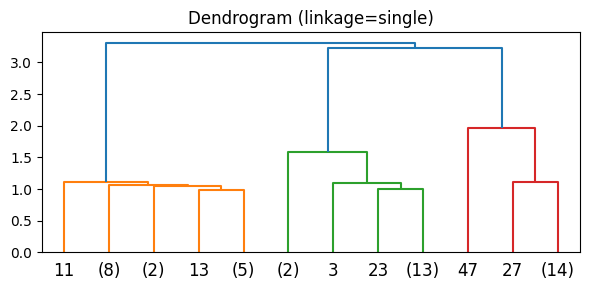

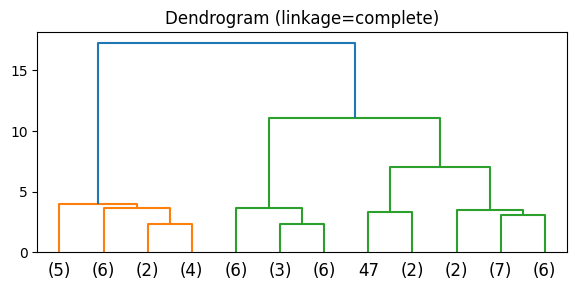

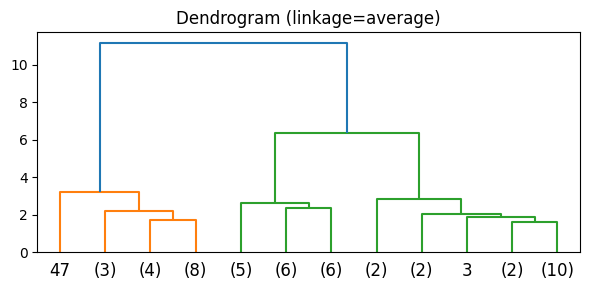

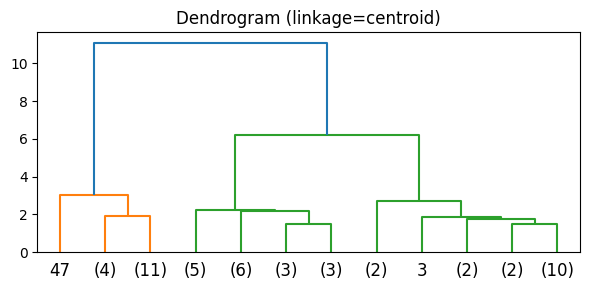

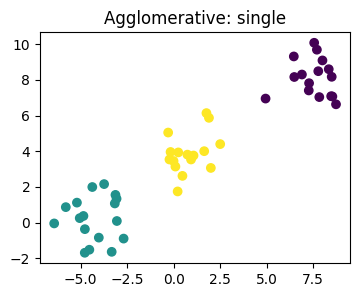

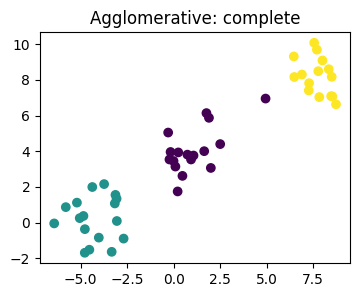

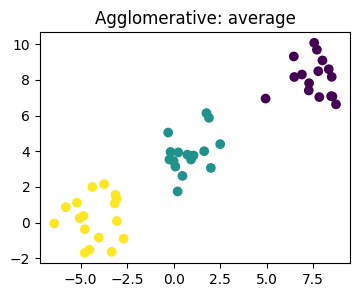

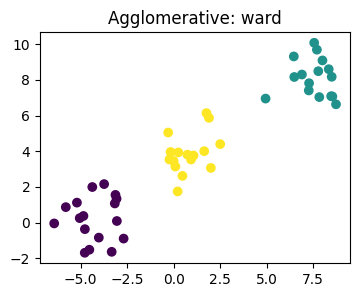

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X, _ = make_blobs(n_samples=50, centers=3, random_state=3)

# 1) Dendrogram and linkage matrix (single, complete, average, centroid)
for method in ['single', 'complete', 'average', 'centroid']:
    plt.figure(figsize=(6,3))
    Z = hierarchy.linkage(pdist(X), method=method)
    hierarchy.dendrogram(Z, truncate_mode='lastp', p=12)
    plt.title(f"Dendrogram (linkage={method})")
    plt.tight_layout()
    plt.show()

# 2) AgglomerativeClustering labels (single/complete/average/ward)
for linkage in ['single', 'complete', 'average', 'ward']:
    # ward requires affinity='euclidean' and linkage='ward'
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = model.fit_predict(X)
    plt.figure(figsize=(4,3))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title(f"Agglomerative: {linkage}")
    plt.show()


4) Agglomerative clustering (sklearn example and extraction of dendrogram)

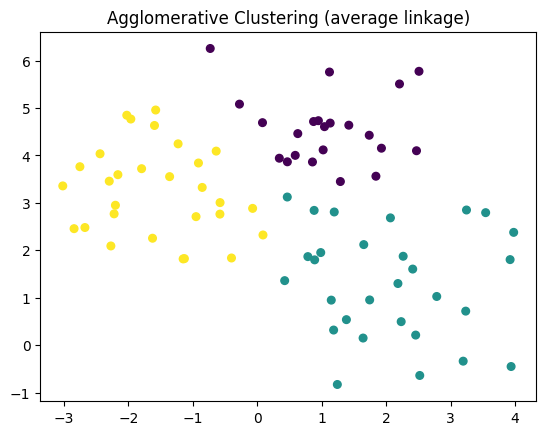

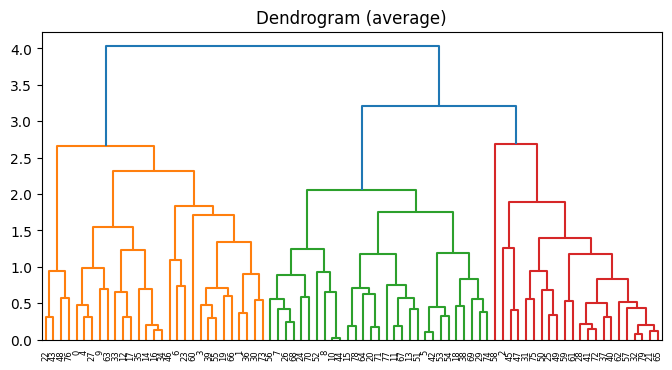

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X, _ = make_blobs(n_samples=80, centers=3, random_state=0)

# fit sklearn Agglomerative (labels)
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=30)
plt.title("Agglomerative Clustering (average linkage)")
plt.show()

# to draw a dendrogram, compute linkage via scipy:
Z = hierarchy.linkage(pdist(X), method='average')
plt.figure(figsize=(8,4))
hierarchy.dendrogram(Z)
plt.title("Dendrogram (average)")
plt.show()


5) BIRCH (sklearn)

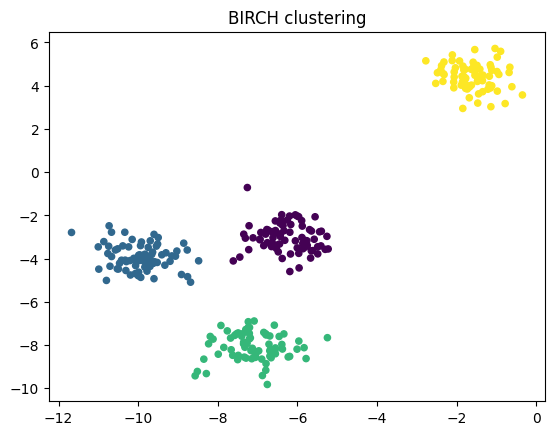

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=1)
brc = Birch(n_clusters=4, threshold=0.5, branching_factor=50)
labels = brc.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, s=20)
plt.title("BIRCH clustering")
plt.show()


6) CHAMELEON

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


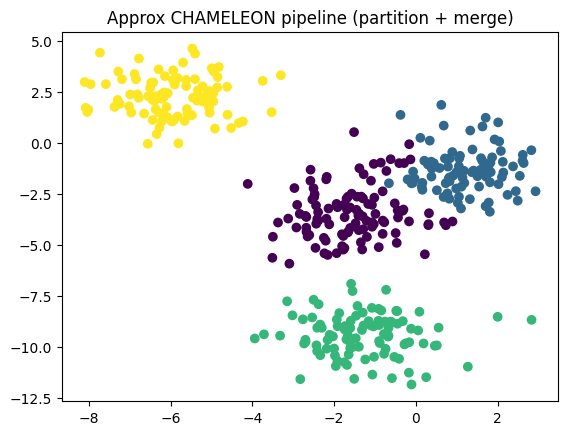

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# 1. create data
X, _ = make_blobs(n_samples=400, centers=4, random_state=2)

# 2. construct kNN graph (sparse adjacency)
A = kneighbors_graph(X, n_neighbors=10, mode='connectivity', include_self=False)
# optional: symmetrize
A = 0.5 * (A + A.T)

# 3. initial partitioning into many small subclusters (like CHAMELEON phase 1)
init_parts = 30
spec = SpectralClustering(n_clusters=init_parts, affinity='precomputed', assign_labels='kmeans', random_state=0)
labels_small = spec.fit_predict(A)

# compute centroids of small clusters
centroids = []
for i in range(init_parts):
    pts = X[labels_small == i]
    if len(pts) == 0:
        centroids.append(np.zeros(X.shape[1]))
    else:
        centroids.append(pts.mean(axis=0))
centroids = np.array(centroids)

# 4. merge the small clusters (approximate CHAMELEON merging) using Agglomerative on centroids
# You could improve merging by using measures based on interconnectivity; here we use average linkage on centroids
n_final = 4
agg = AgglomerativeClustering(n_clusters=n_final, linkage='average')
final_labels = agg.fit_predict(centroids)

# map final labels back to original points
label_map = {i: final_labels[i] for i in range(init_parts)}
labels_final = np.array([label_map[l] for l in labels_small])

plt.scatter(X[:,0], X[:,1], c=labels_final)
plt.title("Approx CHAMELEON pipeline (partition + merge)")
plt.show()


7) DBSCAN (sklearn)

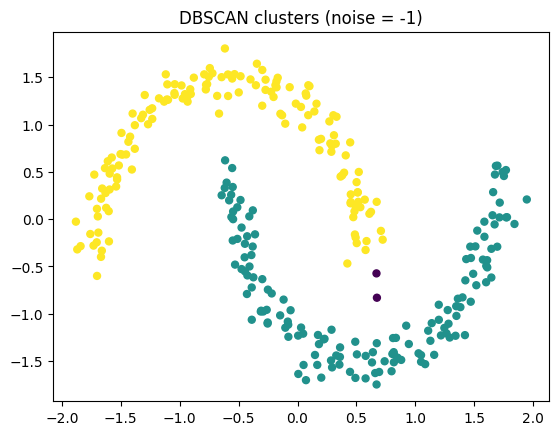

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.07, random_state=0)
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.25, min_samples=5)
labels = db.fit_predict(X)

# -1 are noise points
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=25)
plt.title("DBSCAN clusters (noise = -1)")
plt.show()


8) Spectral Clustering (sklearn)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


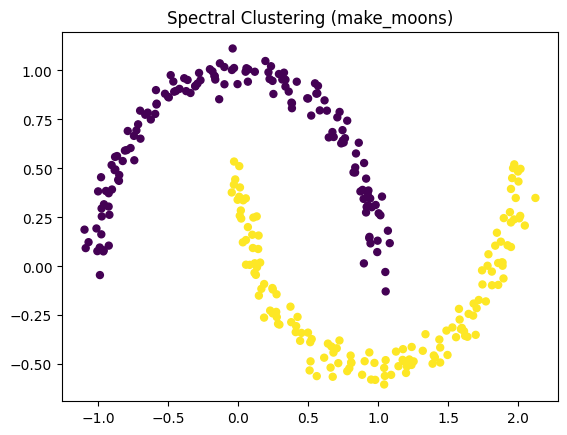

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import SpectralClustering

# example: nonlinearly separable dataset
X, _ = datasets.make_moons(n_samples=300, noise=0.05, random_state=0)

sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans', random_state=0)
labels = sc.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, s=25)
plt.title("Spectral Clustering (make_moons)")
plt.show()
